<a href="https://colab.research.google.com/github/Amakudegloria/Amazon-fire-Analysis/blob/main/forest_fire_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

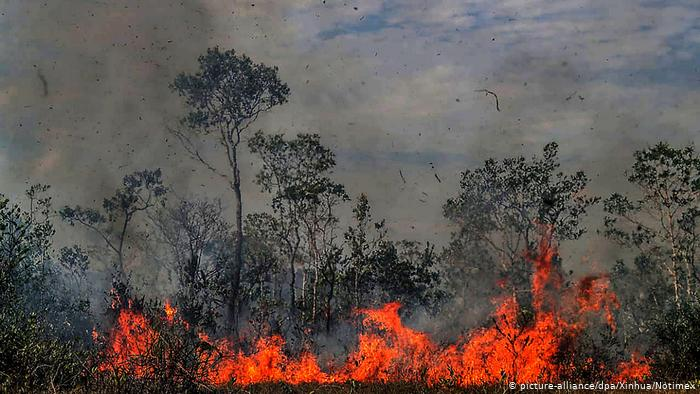


The planet is getting hotter and drier, marked by the impacts of global warming. Such impacts are increasingly intensified by the destruction caused by forest fires (DENNISON et al., 2014). These events cause several problems, not only environmental, but also cause economic damage and represent a great danger to life. Understanding the frequency of forest fires over a period of time can help you take steps to avoid them.

#Data
This dataset reports the number of forest fires in Brazil. The series covers the period of approximately 10 years (1998 to 2017). Data can be found below:
*data.gov*
With these data, it is possible to assess the evolution of fires over the years, as well as the regions where they were concentrated. Legal Amazon comprises the states of Acre, Amapá, Pará, Amazonas, Rondônia, Roraima and part of Mato Grosso, Tocantins and Maranhão.



In [1]:
#Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install pandasql
import pandasql as psql
sql=psql.sqldf
import numpy as np
sns.set_style("dark")
!pip install sidetable
import sidetable

In [2]:
df = pd.read_csv('https://github.com/Amakudegloria/Amazon-fire-Analysis/raw/main/amazon.csv', encoding = 'latin_1', parse_dates=['date'], index_col = 'date')
df.head()

,year,state,month,number
date,,,,
1998-01-01,1998,Acre,Janeiro,0.0
1999-01-01,1999,Acre,Janeiro,0.0
2000-01-01,2000,Acre,Janeiro,0.0
2001-01-01,2001,Acre,Janeiro,0.0
2002-01-01,2002,Acre,Janeiro,0.0


In [22]:
print(df.dtypes)
print(df.shape)

year       int64
state     object
month     object
number     int64
dtype: object
(6422, 4)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6454 entries, 1998-01-01 to 2016-01-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 252.1+ KB


In [5]:
df.isna().sum()

year      0
state     0
month     0
number    0
dtype: int64

In [6]:
len(df[df.duplicated()] )

32

In [7]:
df = df.drop_duplicates()

In [8]:
df['number'] = df['number'].astype(int)

In [9]:
df.state.value_counts()

Rio                 697
Mato Grosso         473
Paraiba             472
Bahia               239
Rondonia            239
Ceara               239
Amapa               239
Amazonas            239
Acre                239
Pará                239
Distrito Federal    239
Minas Gerais        239
Roraima             239
Tocantins           239
Santa Catarina      239
Maranhao            239
Sao Paulo           239
Sergipe             239
Goias               239
Pernambuco          239
Alagoas             239
Piau                239
Espirito Santo      239
Name: state, dtype: int64

In [10]:
df.month.value_counts()

#Let's name the months
df['month'] = df['month'].map({'Agosto':'August', 'Outubro':'October', 'Novembro':'November', 'Setembro':'September','Junho':'June', 'Julho':'July', 'Janeiro':'January', 'Fevereiro':'February','Abril':'April','Março':'March','Maio':'May','Dezembro':'December'})

In [11]:
#Convert the number of months from a float dtype to integer
df['number'] = df['number'].astype(int)

In [12]:
#Visualize the number of forest fires per year

fig = go.Figure(data=go.Scatter(x = df.groupby(['year'])['number'].sum().index, 
                                y = df.groupby(['year'])['number'].sum().values))
fig.update_layout(title='Forest fire in Brazil over the years',
                   xaxis_title='Year',
                   yaxis_title='Number of forest fires')
fig.show()

In [13]:
#Visualize the occurence of forest fires monthly

fig = go.Figure(data=go.Scatter(x = df.groupby(['month'])['number'].sum().index, y = df.groupby(['month'])['number'].sum().values))
fig.update_layout(title='Forest fire distribution with respect to months (1998 - 2017)',
                   xaxis_title='Month',
                   yaxis_title='Number of forest fires')
fig.show()

Text(0, 0.5, 'number')

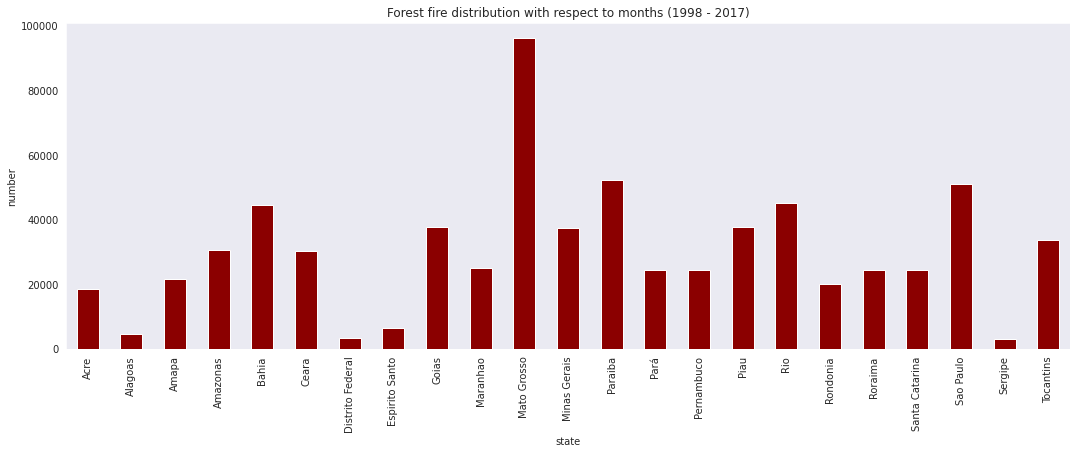

In [14]:
ax = df.groupby(['state'])['number'].sum()#.reindex(['Janeiro','Fevereiro','Março','Abril','Maio','Julho','Julho','Agosto',
                                                          # 'Setembro','Outubro','Novembro','Dezembro'])
ax.plot(kind = 'bar', figsize=(18, 6), color = 'darkred')
plt.title("Forest fire distribution with respect to states (1998 - 2017)")
plt.xlabel('state')
plt.ylabel('number')

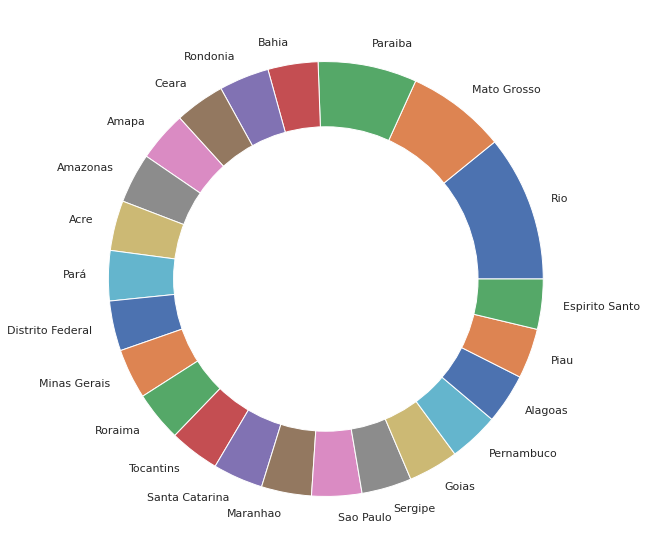

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(df['state'].value_counts().values, labels = df['state'].value_counts().index)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
import plotly.express as px
fig = px.pie(values=df['state'].value_counts().values, names=df['state'].value_counts().index,title='Cities involving forest fires')
fig.show()

In [17]:
fig = px.scatter(df, x="state", y="month",size='number')
fig.show()

In [18]:
fig = px.scatter(df, x="year", y="month",size='number')
fig.show()

In [19]:
#Using Sidetable to check how data is distributed.

df.stb.freq(['state'],style=True)

,state,count,percent,cumulative_count,cumulative_percent
0,Rio,697,10.85%,697,10.85%
1,Mato Grosso,473,7.37%,"1,170",18.22%
2,Paraiba,472,7.35%,"1,642",25.57%
3,Tocantins,239,3.72%,"1,881",29.29%
4,Sergipe,239,3.72%,"2,120",33.01%
5,Sao Paulo,239,3.72%,"2,359",36.73%
6,Santa Catarina,239,3.72%,"2,598",40.45%
7,Roraima,239,3.72%,"2,837",44.18%
8,Rondonia,239,3.72%,"3,076",47.90%
9,Piau,239,3.72%,"3,315",51.62%


In [20]:
#Now that we have this information lets see how many fires by region and state using sql.

fires_by_region=sql('''select state, round(sum(number)) as number_fires, round(avg(number)) as average_fires from df
             group by state
             order by number desc''')   



print(fires_by_region)

               state  number_fires  average_fires
0              Ceara       30415.0          127.0
1              Amapa       21831.0           91.0
2               Piau       37777.0          158.0
3              Bahia       44718.0          187.0
4         Pernambuco       24498.0          103.0
5            Alagoas        4606.0           19.0
6           Rondonia       20259.0           85.0
7            Roraima       24384.0          102.0
8           Amazonas       30636.0          128.0
9        Mato Grosso       96178.0          203.0
10         Tocantins       33675.0          141.0
11      Minas Gerais       37453.0          157.0
12               Rio       45094.0           65.0
13             Goias       37677.0          158.0
14         Sao Paulo       51118.0          214.0
15           Paraiba       52423.0          111.0
16           Sergipe        3237.0           14.0
17    Santa Catarina       24359.0          102.0
18    Espirito Santo        6546.0           27.0


We can clearly see that Mato Grosso has the highest cases of forest fires and this is aldso known to have very dry weather but could also be due to the influence of the agricultural lobby that exists in Brazil. 

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]), <a list of 10 Text major ticklabel objects>)

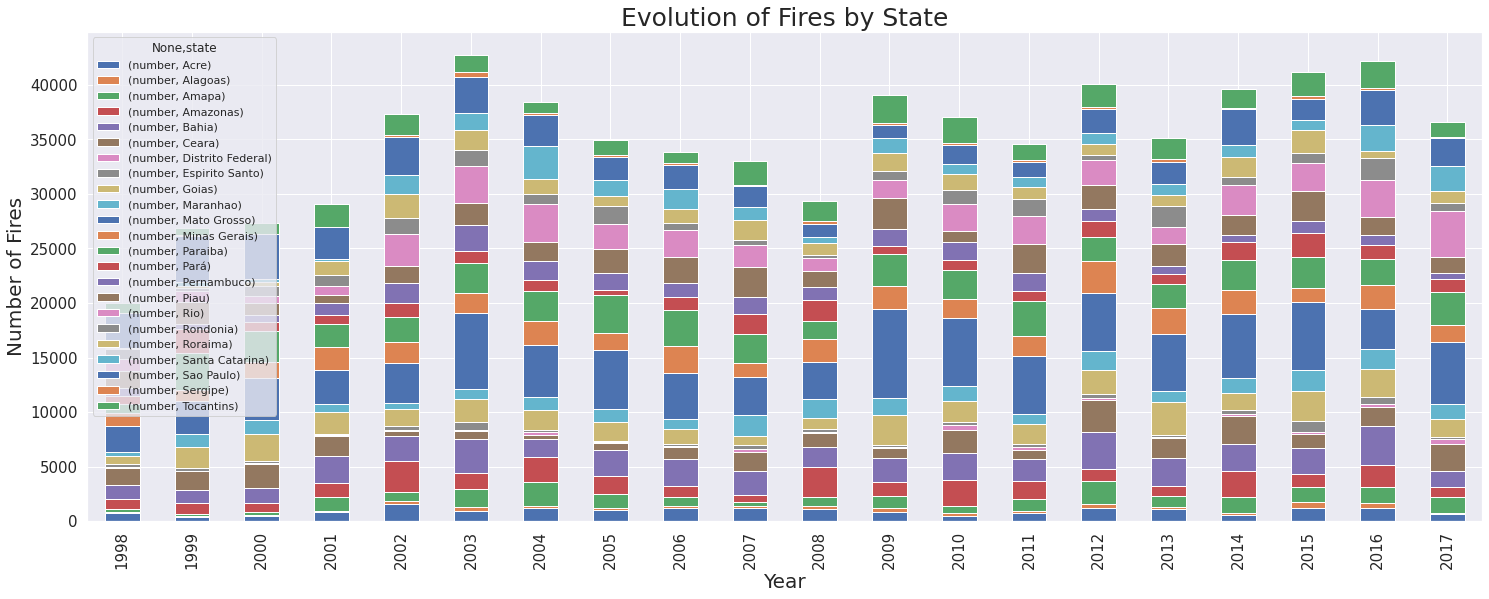

In [21]:
#Let's check the fires trend by region & year


evolutionbyregion=df.groupby(['year','state']).sum().sort_values('year',ascending=True).unstack().fillna(0)         

evolutionbyregion.plot(kind='bar',stacked=True,figsize=(25,9))
plt.title('Evolution of Fires by State', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(['Midwest','North','Northeast','South','Southeast'],bbox_to_anchor=(1, 0.5))

Looking quickly, it doesn't look like the distribution between the regions have changed from 1998-2017. Mato Grosso and Sao Paulo experience the most case of fire.
